# E-commerce (Online Retail)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Online Gaming
title = "Online Shopping"
symbols = ['AMZN', 'BABA', 'JD', 'W', 'CPRT', 'VIPS', 'EXPE', 'STMP', 'CMPR', 'MMYT', 'SSTK', 'GRPN', 'LQDT', 'TOUR', 'ETSY']
start = '2018-01-01'
end = '2020-06-26'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
2 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

905

In [7]:
df.head()

,AMZN,BABA,JD,W,CPRT,VIPS,EXPE,STMP,CMPR,MMYT,SSTK,GRPN,LQDT,TOUR,ETSY
Date,,,,,,,,,,,,,,,
2018-01-02,1189.010010,183.649994,43.279999,81.019997,43.599998,12.50,118.357040,187.350006,121.250000,31.150000,40.635517,104.800003,4.70,7.72,20.83
2018-01-03,1204.199951,184.000000,43.509998,78.449997,43.389999,12.20,122.012444,188.949997,123.470001,30.799999,41.485981,103.000000,4.70,7.76,20.41
2018-01-04,1209.589966,185.710007,43.669998,79.300003,43.740002,12.01,122.957962,186.800003,124.839996,29.350000,41.785049,102.400002,4.80,7.77,20.23
2018-01-05,1229.140015,190.699997,45.639999,80.750000,43.529999,12.37,123.913246,187.500000,123.620003,30.650000,41.299068,104.599998,4.85,7.79,20.25
2018-01-08,1246.869995,190.330002,46.099998,83.050003,43.549999,13.58,124.975761,190.250000,124.930000,31.549999,40.747665,104.400002,4.90,7.80,20.32


In [8]:
df.tail()

,AMZN,BABA,JD,W,CPRT,VIPS,EXPE,STMP,CMPR,MMYT,SSTK,GRPN,LQDT,TOUR,ETSY
Date,,,,,,,,,,,,,,,
2020-06-19,2675.010010,220.639999,58.639999,209.990005,84.410004,21.190001,82.059998,175.580002,76.930000,17.850000,35.480000,21.590000,5.84,1.100,95.389999
2020-06-22,2713.820068,221.410004,59.090000,208.059998,84.660004,21.110001,83.120003,185.470001,78.959999,17.020000,35.880001,20.059999,6.44,1.060,96.300003
2020-06-23,2764.409912,228.750000,59.919998,207.529999,84.529999,20.650000,86.599998,180.309998,79.510002,17.420000,36.009998,21.250000,6.45,1.180,101.220001
2020-06-24,2734.399902,226.220001,59.840000,200.710007,81.309998,20.240000,81.239998,179.050003,80.589996,16.940001,35.169998,19.889999,6.33,1.295,98.169998
2020-06-25,2754.580078,222.160004,60.509998,205.119995,81.500000,19.709999,82.720001,175.000000,81.290001,17.270000,34.820000,20.219999,6.24,1.350,101.279999


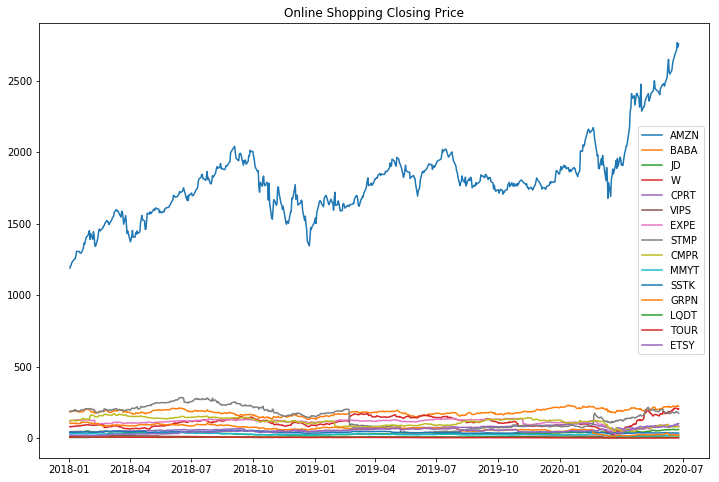

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

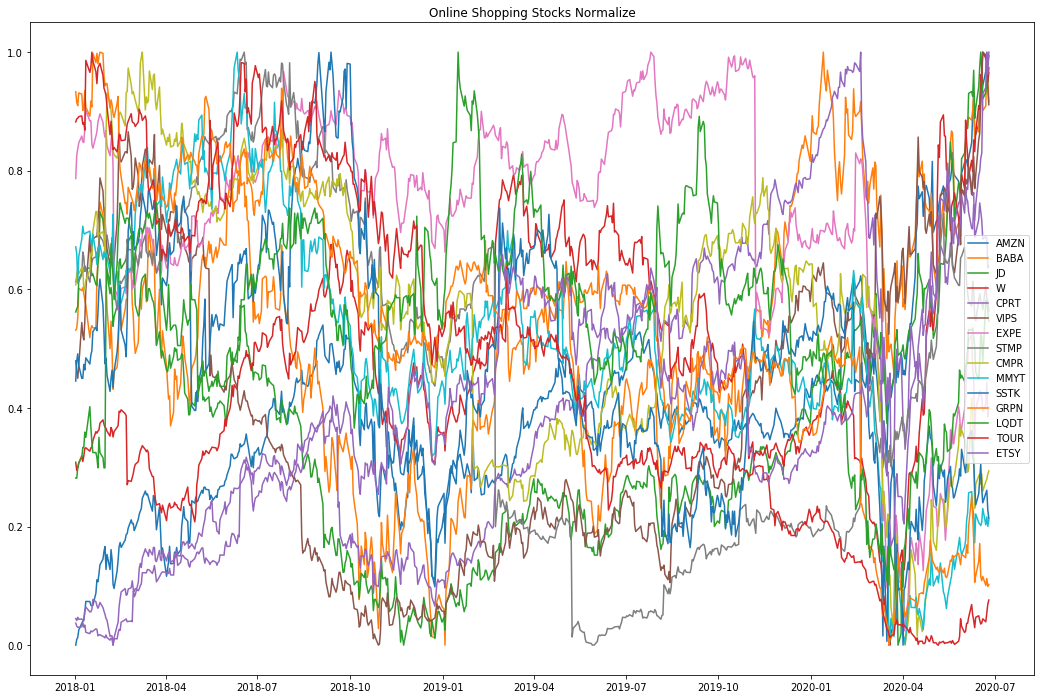

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

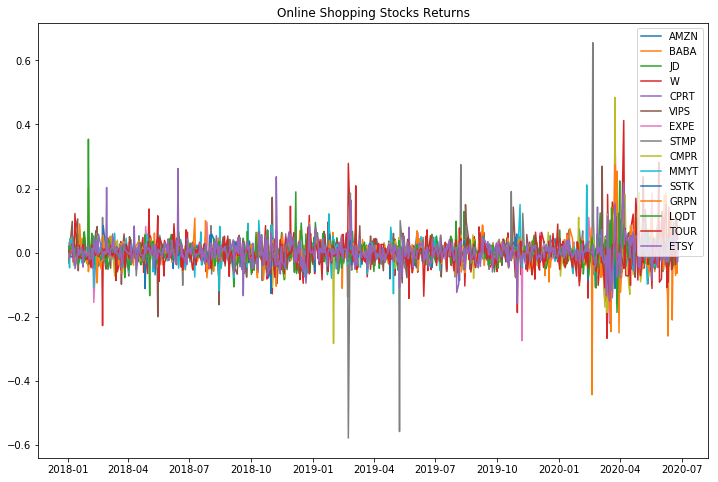

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title + ' Stocks Returns')
plt.legend(labels=stock_rets.columns)

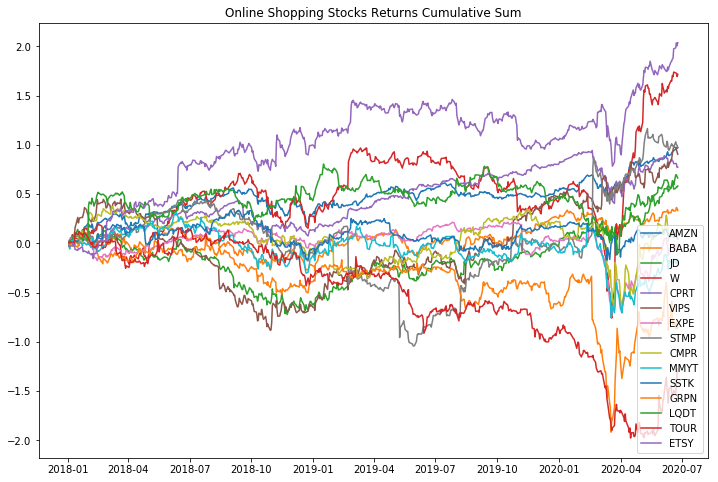

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title(title + ' Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

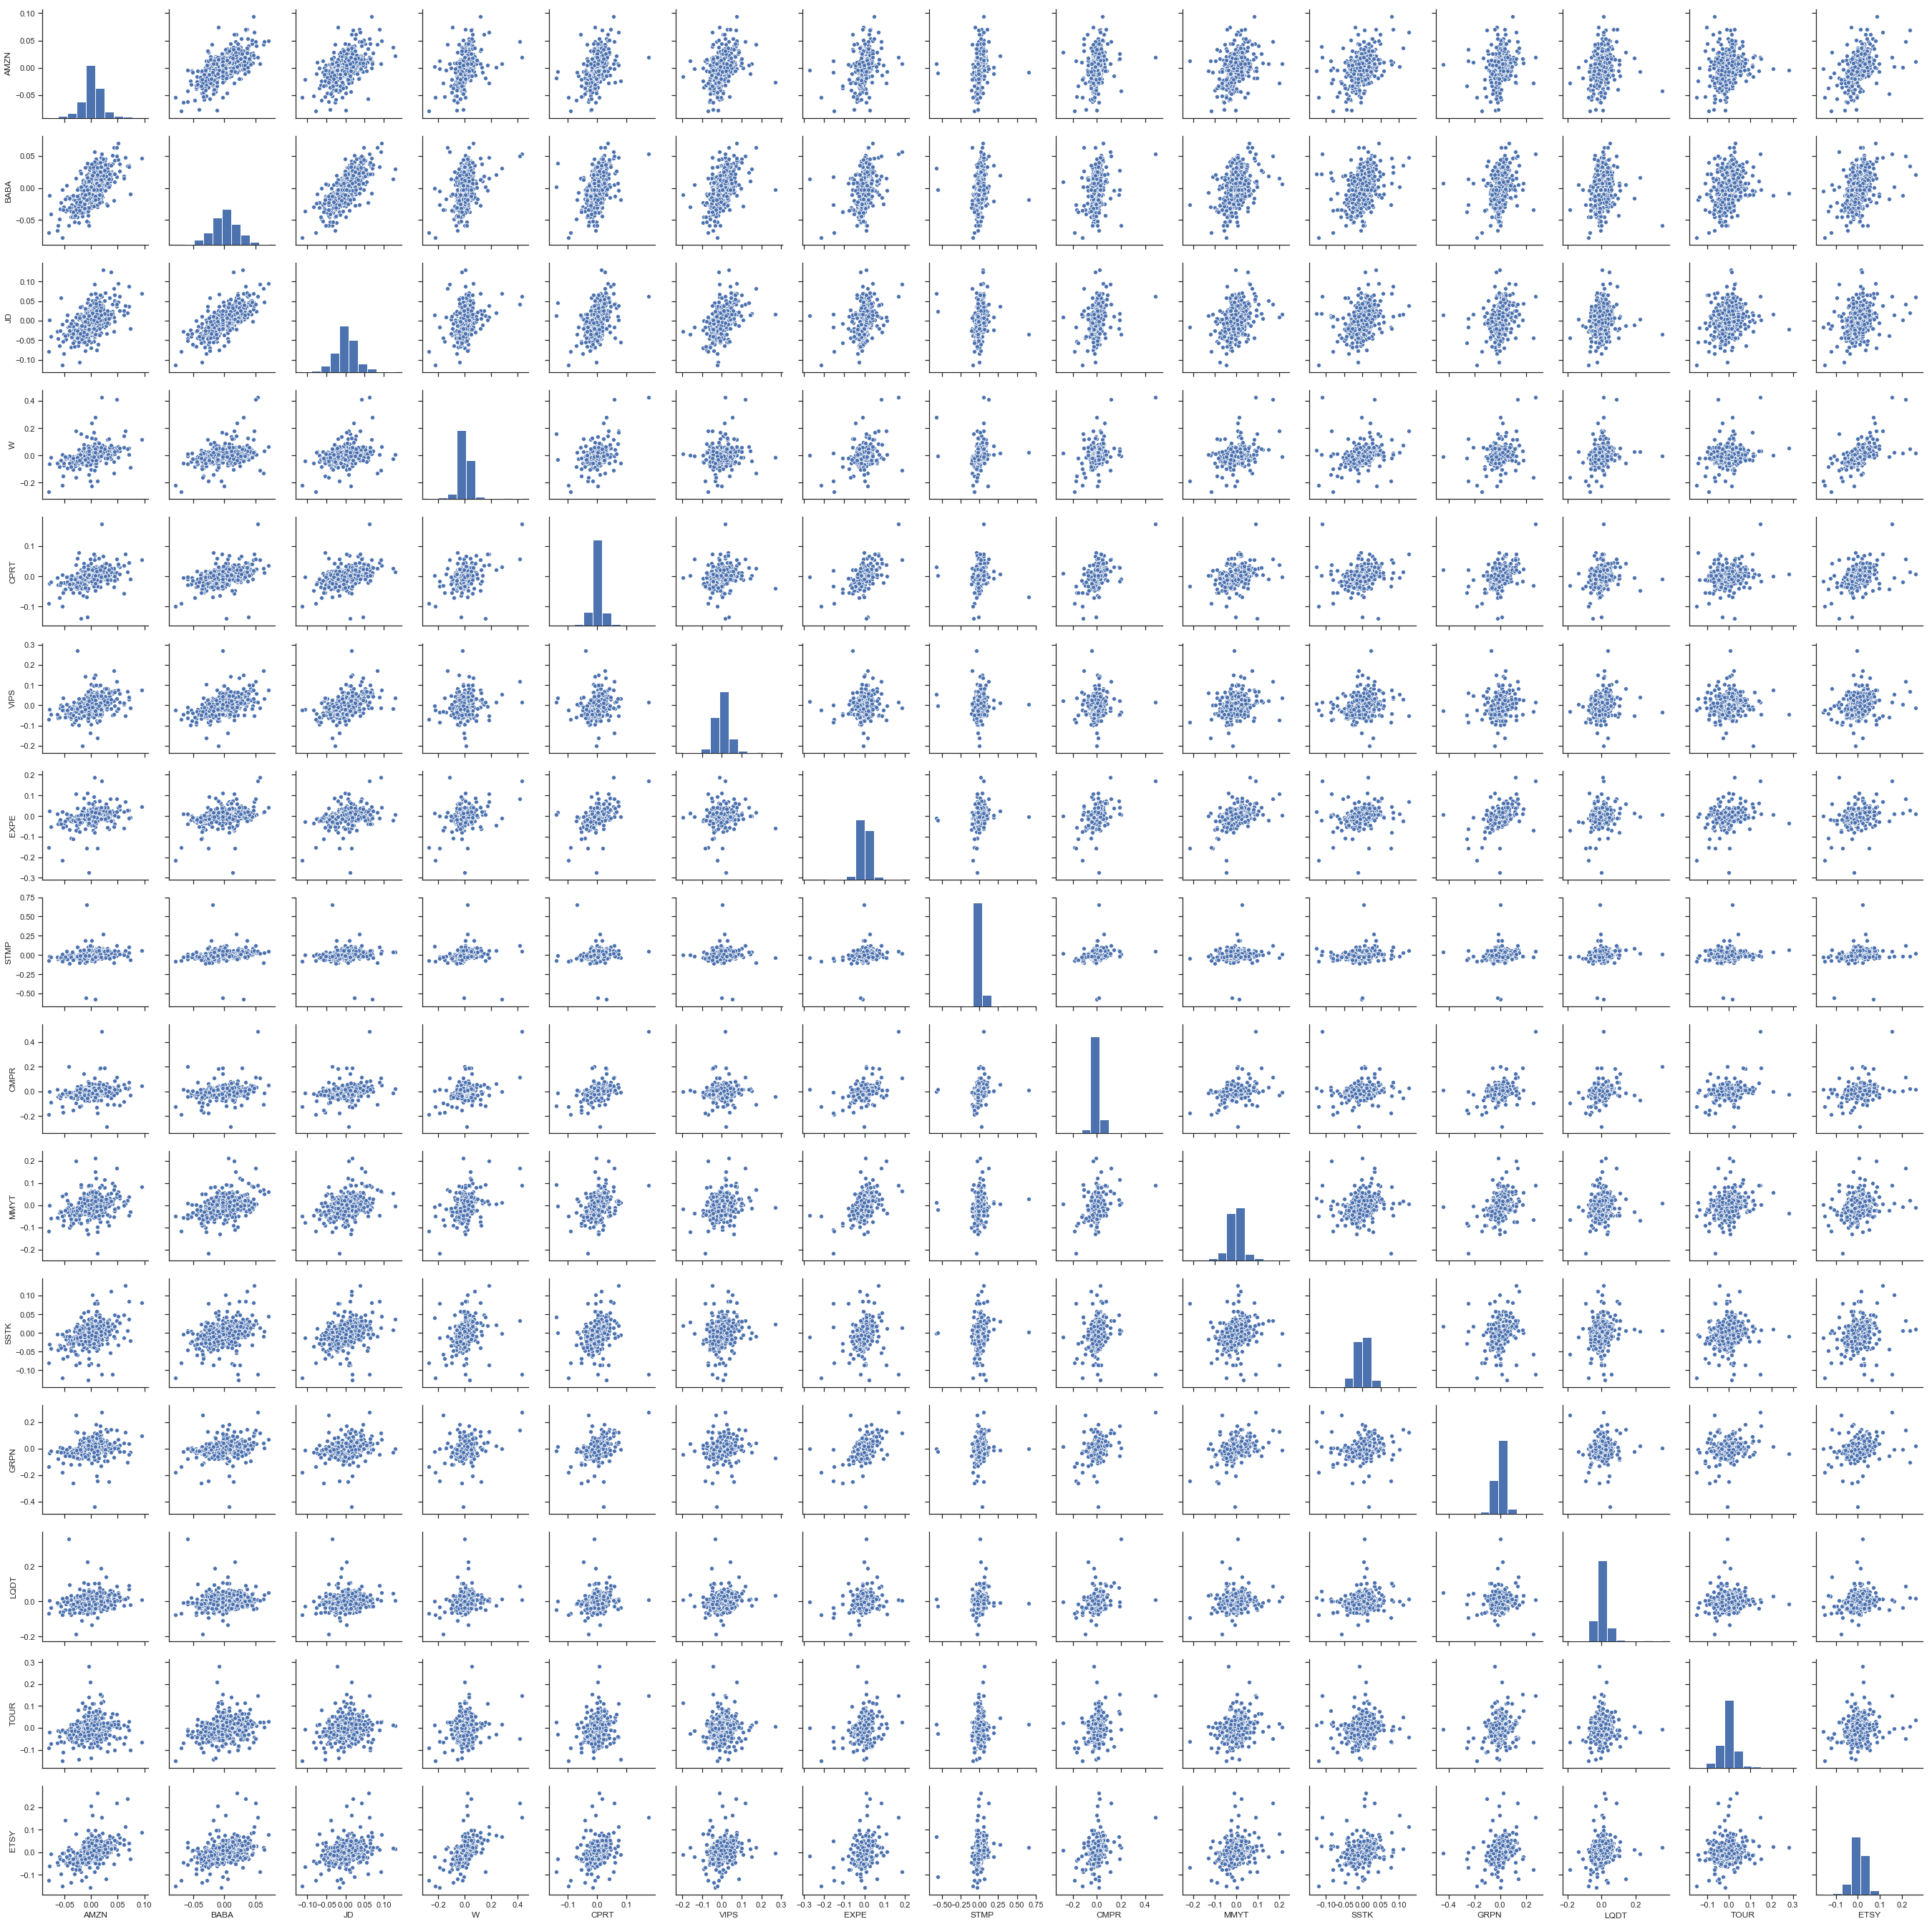

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

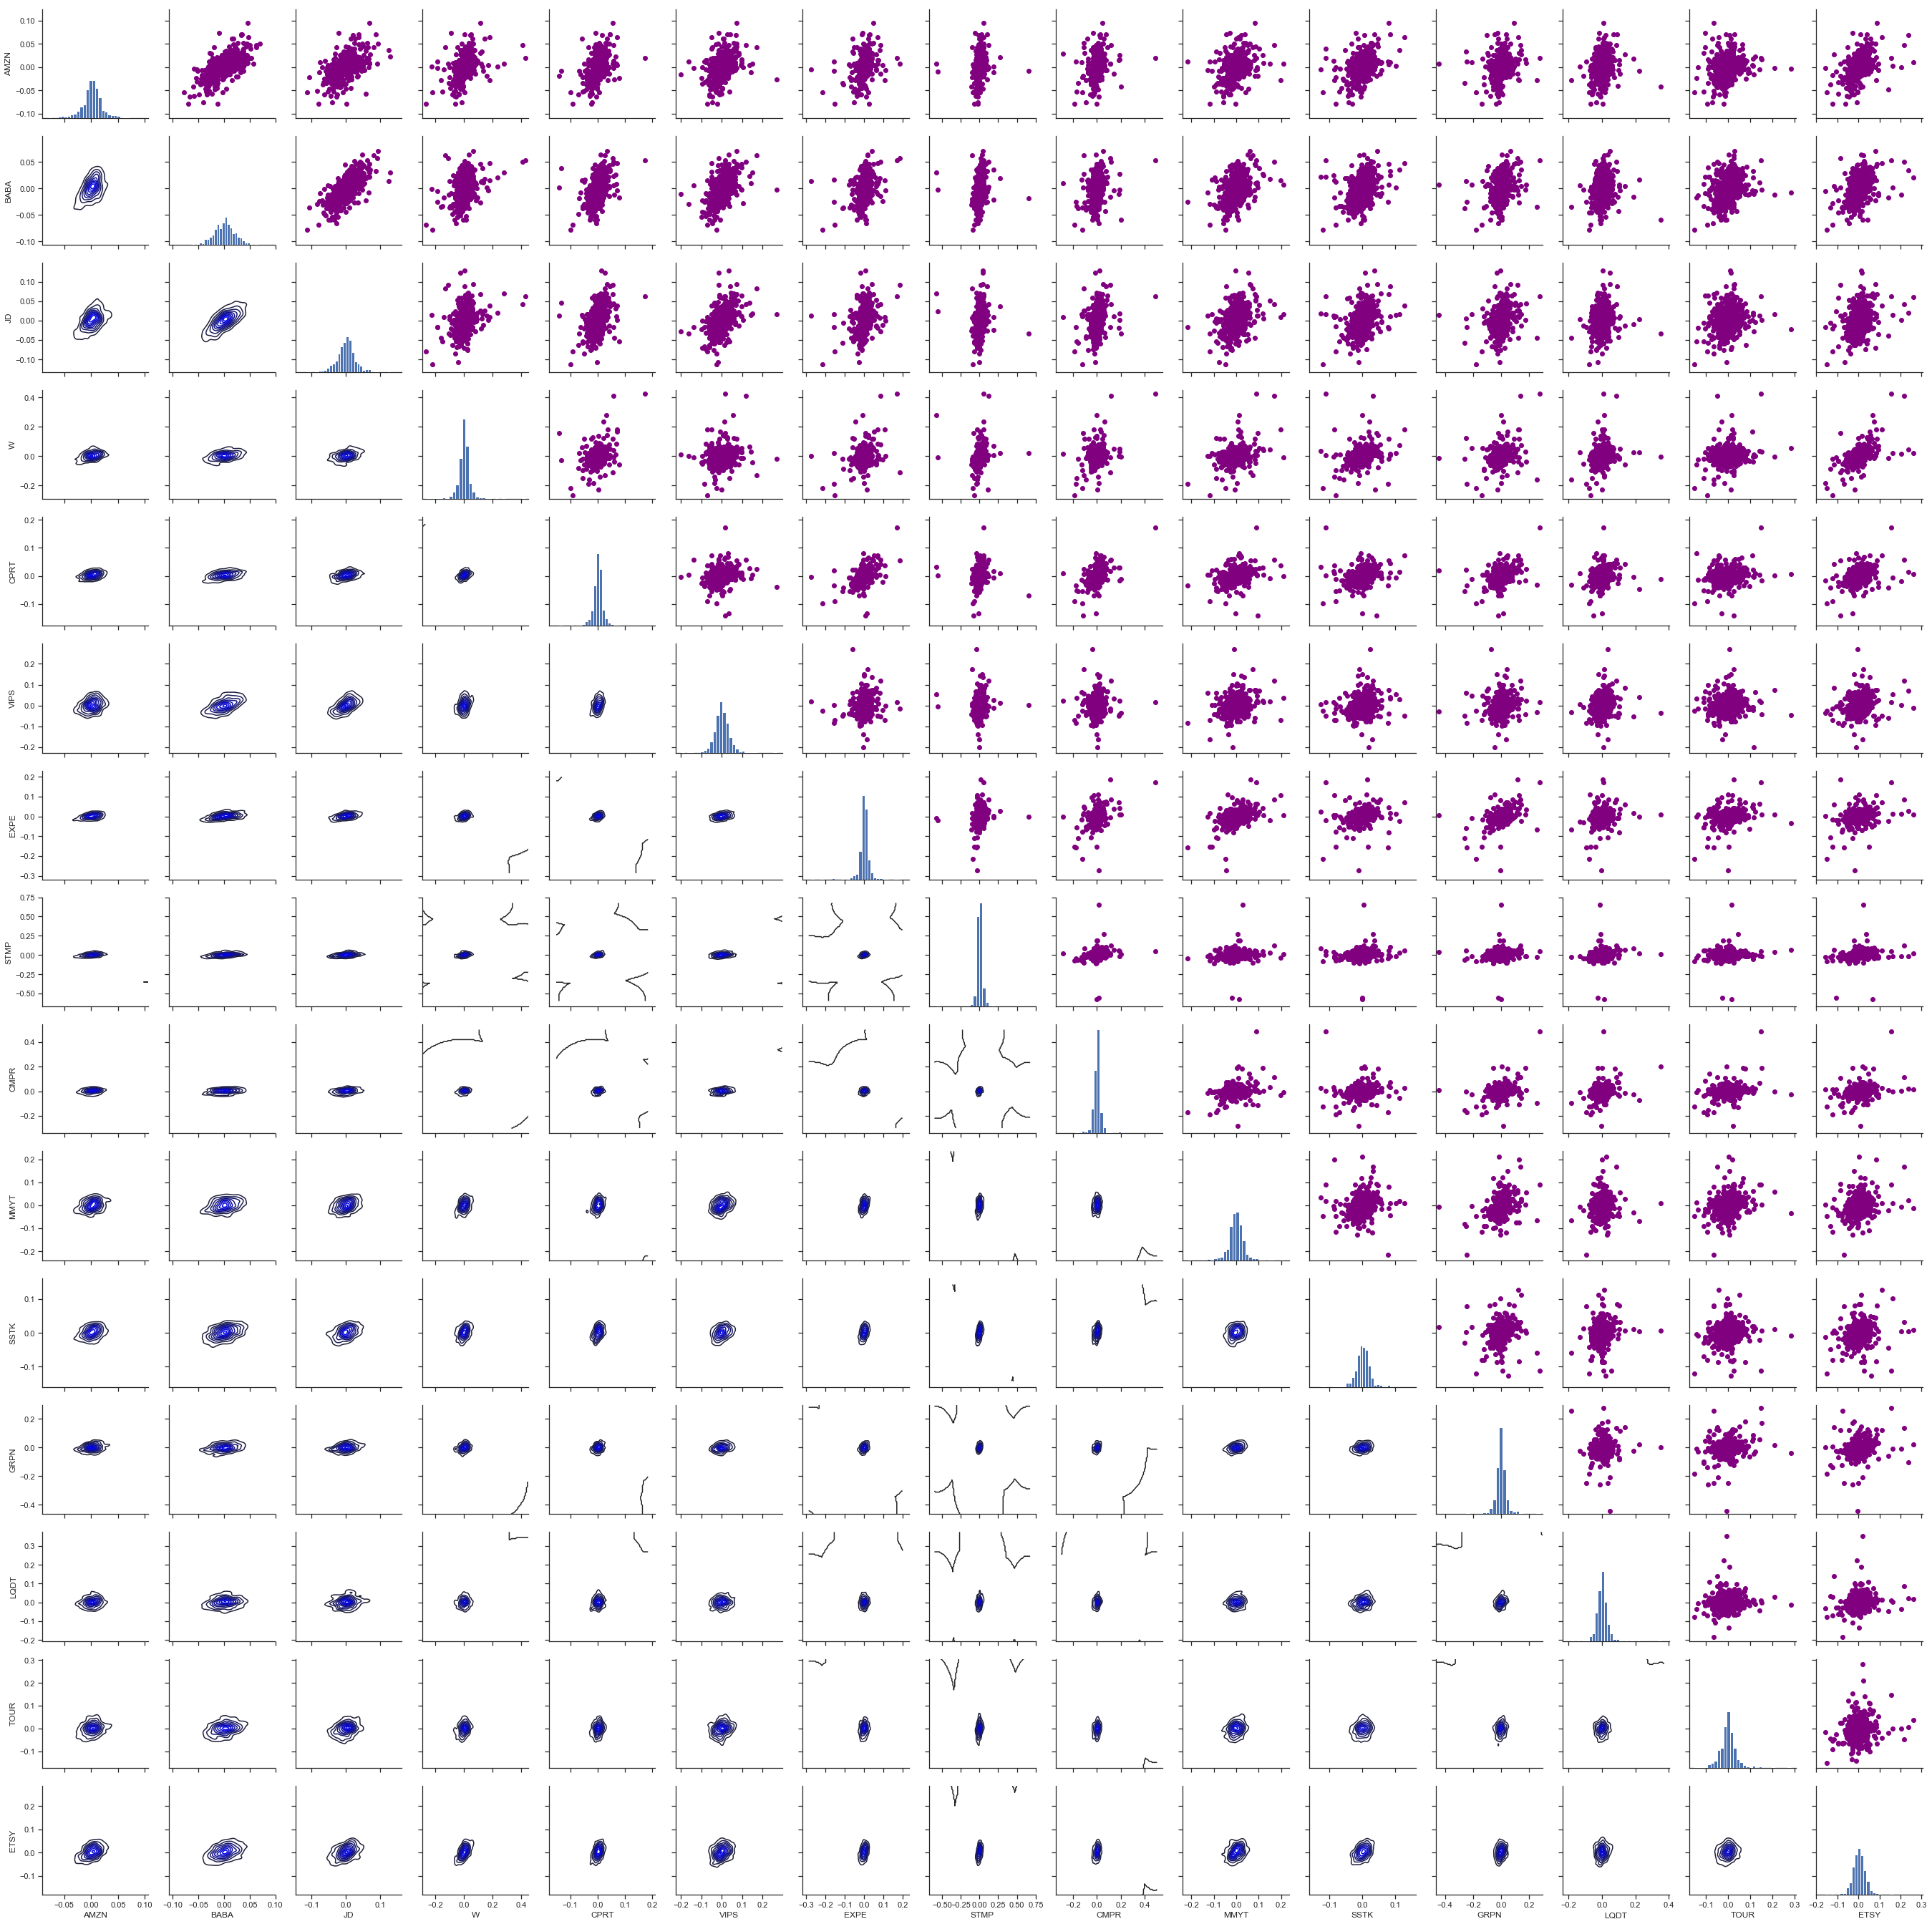

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

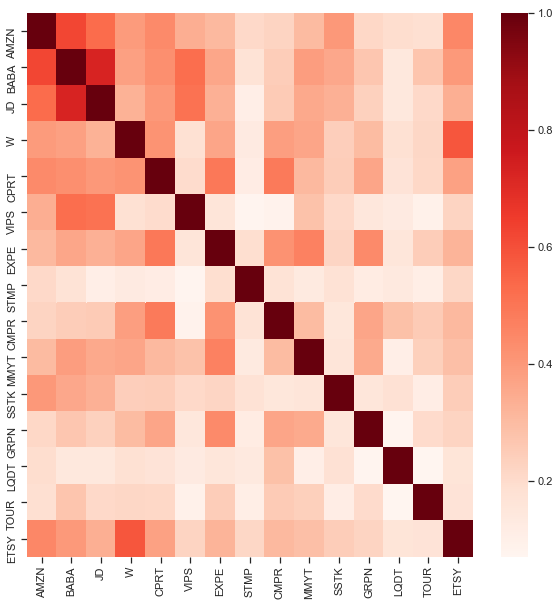

In [17]:
plt.figure(figsize=(10,10))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

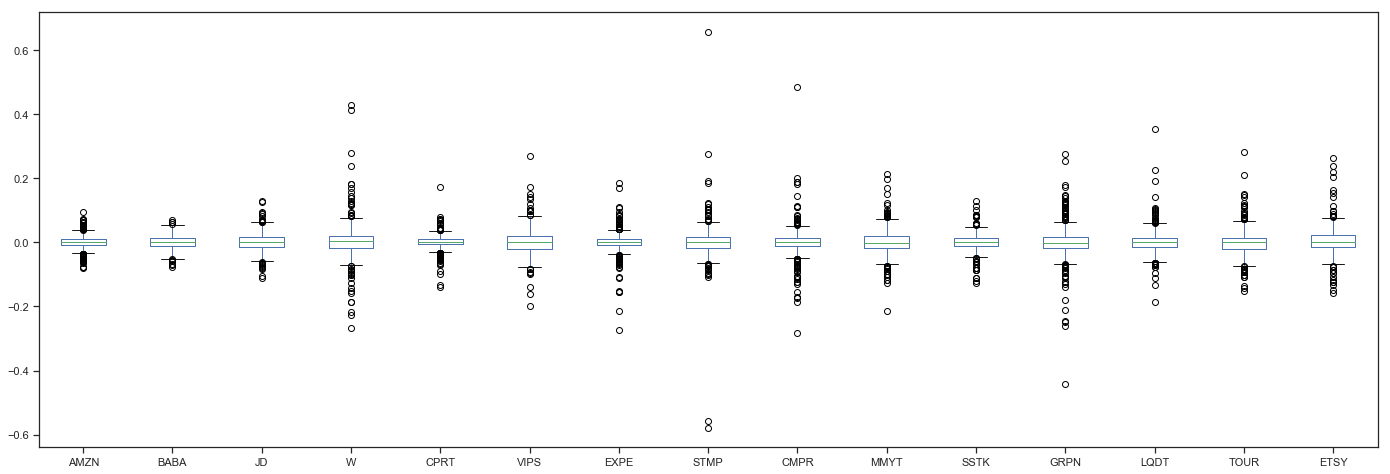

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(24,8))

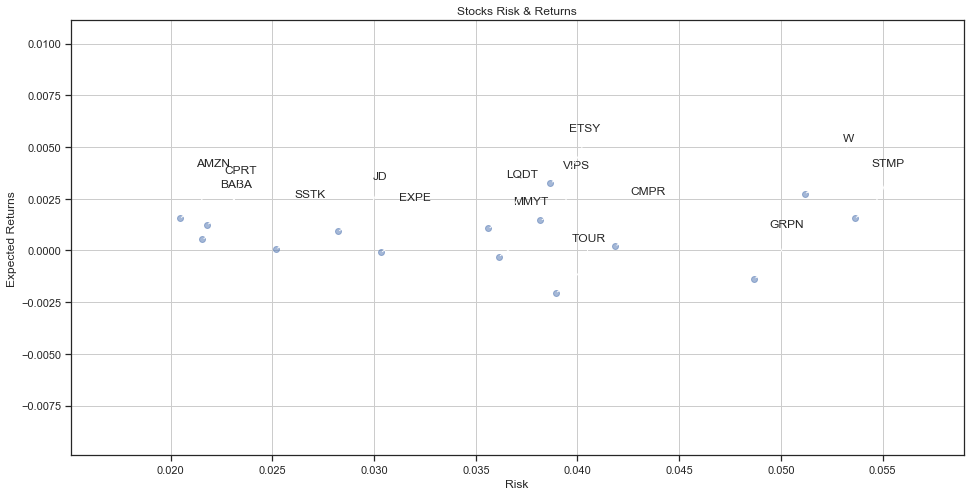

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

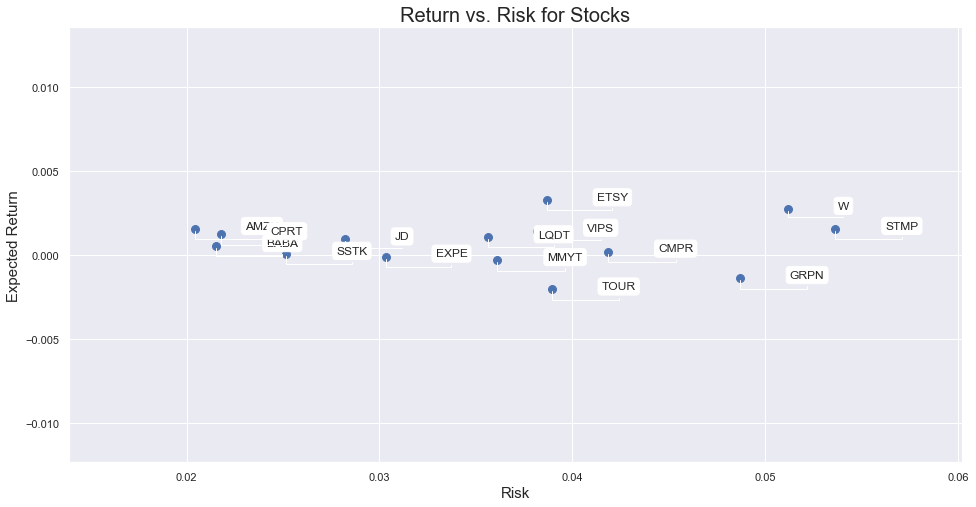

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel("Risk", fontsize=15)
plt.ylabel("Expected Return", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.std(), rets.mean()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

ETSY  ETSY    1.000000
TOUR  TOUR    1.000000
BABA  BABA    1.000000
JD    JD      1.000000
W     W       1.000000
CPRT  CPRT    1.000000
VIPS  VIPS    1.000000
EXPE  EXPE    1.000000
CMPR  CMPR    1.000000
MMYT  MMYT    1.000000
SSTK  SSTK    1.000000
GRPN  GRPN    1.000000
LQDT  LQDT    1.000000
STMP  STMP    1.000000
AMZN  AMZN    1.000000
BABA  JD      0.728167
JD    BABA    0.728167
AMZN  BABA    0.623540
BABA  AMZN    0.623540
ETSY  W       0.584408
W     ETSY    0.584408
AMZN  JD      0.529407
JD    AMZN    0.529407
VIPS  BABA    0.521914
BABA  VIPS    0.521914
VIPS  JD      0.511976
JD    VIPS    0.511976
CPRT  EXPE    0.493708
EXPE  CPRT    0.493708
CPRT  CMPR    0.491147
                ...   
LQDT  STMP    0.138022
STMP  LQDT    0.138022
MMYT  STMP    0.132666
STMP  MMYT    0.132666
VIPS  LQDT    0.132209
LQDT  VIPS    0.132209
STMP  W       0.130498
W     STMP    0.130498
STMP  GRPN    0.122858
GRPN  STMP    0.122858
STMP  CPRT    0.118703
CPRT  STMP    0.118703
SSTK  TOUR 

In [22]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,AMZN,BABA,JD,W,CPRT,VIPS,EXPE,STMP,CMPR,MMYT,SSTK,GRPN,LQDT,TOUR,ETSY
Date,,,,,,,,,,,,,,,
2018-01-03,0.529708,0.539969,0.488254,0.338183,0.432239,0.373907,0.662419,0.475557,0.392456,0.478691,0.580312,0.593523,0.344545,0.359829,0.326807
2018-01-04,0.481922,0.589834,0.481474,0.399395,0.473252,0.391863,0.612131,0.459399,0.383051,0.394830,0.526239,0.609358,0.383921,0.350828,0.353824
2018-01-05,0.549212,0.708469,0.653091,0.410111,0.432288,0.488922,0.612174,0.471669,0.355844,0.608614,0.451991,0.647456,0.363823,0.353800,0.377182
2018-01-08,0.539206,0.514010,0.507989,0.424780,0.449035,0.633487,0.613925,0.480527,0.382401,0.573684,0.445208,0.614817,0.363624,0.350817,0.383060
2018-01-09,0.483071,0.543773,0.468939,0.352634,0.442456,0.370129,0.579519,0.509989,0.369211,0.553184,0.497828,0.580069,0.382314,0.315241,0.442805


In [23]:
Normalized_Value.corr()

,AMZN,BABA,JD,W,CPRT,VIPS,EXPE,STMP,CMPR,MMYT,SSTK,GRPN,LQDT,TOUR,ETSY
AMZN,1.000000,0.623540,0.529407,0.395002,0.443066,0.341891,0.308963,0.211119,0.225842,0.304840,0.403535,0.214087,0.194879,0.188695,0.449388
BABA,0.623540,1.000000,0.728167,0.382806,0.429878,0.521914,0.362231,0.175112,0.248276,0.388620,0.358317,0.269944,0.145286,0.271992,0.398056
JD,0.529407,0.728167,1.000000,0.329885,0.401921,0.511976,0.334538,0.110647,0.252861,0.356663,0.334997,0.237358,0.146901,0.211198,0.336071
W,0.395002,0.382806,0.329885,1.000000,0.418870,0.186704,0.365491,0.130498,0.384676,0.367650,0.242927,0.302610,0.183630,0.219105,0.584408
CPRT,0.443066,0.429878,0.401921,0.418870,1.000000,0.198783,0.493708,0.118703,0.491147,0.308657,0.246260,0.367466,0.171930,0.212513,0.376194
VIPS,0.341891,0.521914,0.511976,0.186704,0.198783,1.000000,0.160568,0.076341,0.086648,0.282590,0.209796,0.150447,0.132209,0.095004,0.226079
EXPE,0.308963,0.362231,0.334538,0.365491,0.493708,0.160568,1.000000,0.191786,0.419566,0.469207,0.223167,0.443468,0.156999,0.245878,0.321978
STMP,0.211119,0.175112,0.110647,0.130498,0.118703,0.076341,0.191786,1.000000,0.175789,0.132666,0.176137,0.122858,0.138022,0.112904,0.217647
CMPR,0.225842,0.248276,0.252861,0.384676,0.491147,0.086648,0.419566,0.175789,1.000000,0.303116,0.150943,0.365095,0.286725,0.254538,0.308569
MMYT,0.304840,0.388620,0.356663,0.367650,0.308657,0.282590,0.469207,0.132666,0.303116,1.000000,0.161137,0.351165,0.110364,0.239634,0.289695


In [24]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

ETSY  ETSY    1.000000
TOUR  TOUR    1.000000
BABA  BABA    1.000000
JD    JD      1.000000
W     W       1.000000
CPRT  CPRT    1.000000
VIPS  VIPS    1.000000
EXPE  EXPE    1.000000
CMPR  CMPR    1.000000
MMYT  MMYT    1.000000
SSTK  SSTK    1.000000
GRPN  GRPN    1.000000
LQDT  LQDT    1.000000
STMP  STMP    1.000000
AMZN  AMZN    1.000000
BABA  JD      0.728167
JD    BABA    0.728167
AMZN  BABA    0.623540
BABA  AMZN    0.623540
ETSY  W       0.584408
W     ETSY    0.584408
AMZN  JD      0.529407
JD    AMZN    0.529407
VIPS  BABA    0.521914
BABA  VIPS    0.521914
VIPS  JD      0.511976
JD    VIPS    0.511976
CPRT  EXPE    0.493708
EXPE  CPRT    0.493708
CPRT  CMPR    0.491147
                ...   
LQDT  STMP    0.138022
STMP  LQDT    0.138022
MMYT  STMP    0.132666
STMP  MMYT    0.132666
VIPS  LQDT    0.132209
LQDT  VIPS    0.132209
STMP  W       0.130498
W     STMP    0.130498
STMP  GRPN    0.122858
GRPN  STMP    0.122858
STMP  CPRT    0.118703
CPRT  STMP    0.118703
SSTK  TOUR 

In [25]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
AMZN    0.001556
BABA    0.000537
JD      0.000933
W       0.002751
CPRT    0.001241
VIPS    0.001450
EXPE   -0.000094
STMP    0.001560
CMPR    0.000208
MMYT   -0.000296
SSTK    0.000071
GRPN   -0.001366
LQDT    0.001064
TOUR   -0.002046
ETSY    0.003266
dtype: float64
--------------------------------------------------
Stock risks:
AMZN    0.020436
BABA    0.021545
JD      0.028204
W       0.051164
CPRT    0.021769
VIPS    0.038174
EXPE    0.030316
STMP    0.053629
CMPR    0.041852
MMYT    0.036117
SSTK    0.025170
GRPN    0.048681
LQDT    0.035609
TOUR    0.038925
ETSY    0.038672
dtype: float64


In [26]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
TOUR,-0.002046,0.038925
GRPN,-0.001366,0.048681
MMYT,-0.000296,0.036117
EXPE,-0.000094,0.030316
SSTK,0.000071,0.025170
CMPR,0.000208,0.041852
BABA,0.000537,0.021545
JD,0.000933,0.028204
LQDT,0.001064,0.035609
CPRT,0.001241,0.021769


In [27]:
table.sort_values(by='Risk')

,Returns,Risk
AMZN,0.001556,0.020436
BABA,0.000537,0.021545
CPRT,0.001241,0.021769
SSTK,0.000071,0.025170
JD,0.000933,0.028204
EXPE,-0.000094,0.030316
LQDT,0.001064,0.035609
MMYT,-0.000296,0.036117
VIPS,0.001450,0.038174
ETSY,0.003266,0.038672


In [28]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
AMZN,0.001556,0.020436,-0.413201
BABA,0.000537,0.021545,-0.439209
JD,0.000933,0.028204,-0.321467
W,0.002751,0.051164,-0.141674
CPRT,0.001241,0.021769,-0.402359
VIPS,0.001450,0.038174,-0.223972
EXPE,-0.000094,0.030316,-0.332977
STMP,0.001560,0.053629,-0.157367
CMPR,0.000208,0.041852,-0.233958
MMYT,-0.000296,0.036117,-0.285071


In [29]:
table['Max Returns'] = rets.max()

In [30]:
table['Min Returns'] = rets.min()

In [31]:
table['Median Returns'] = rets.median()

In [32]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
AMZN,0.001556,0.020436,-0.413201,0.094452,-0.079221,0.002077,0.738011
BABA,0.000537,0.021545,-0.439209,0.070061,-0.078093,0.001488,-1.794712
JD,0.000933,0.028204,-0.321467,0.128866,-0.112566,0.000832,1.119649
W,0.002751,0.051164,-0.141674,0.428384,-0.266830,0.002603,2.197194
CPRT,0.001241,0.021769,-0.402359,0.173528,-0.140591,0.001972,0.233677
VIPS,0.001450,0.038174,-0.223972,0.269817,-0.199470,0.000000,-2.618580
EXPE,-0.000094,0.030316,-0.332977,0.186189,-0.273862,0.000606,1.821767
STMP,0.001560,0.053629,-0.157367,0.655039,-0.577696,0.001507,-2.261940
CMPR,0.000208,0.041852,-0.233958,0.484301,-0.282708,0.001562,0.868600
MMYT,-0.000296,0.036117,-0.285071,0.211570,-0.215827,-0.000984,1.948051


In [33]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
AMZN,0.001556,0.020436,-0.413201,0.094452,-0.079221,0.002077,0.738011,0.000008
BABA,0.000537,0.021545,-0.439209,0.070061,-0.078093,0.001488,-1.794712,-0.000020
JD,0.000933,0.028204,-0.321467,0.128866,-0.112566,0.000832,1.119649,0.000012
W,0.002751,0.051164,-0.141674,0.428384,-0.266830,0.002603,2.197194,0.000024
CPRT,0.001241,0.021769,-0.402359,0.173528,-0.140591,0.001972,0.233677,0.000003
VIPS,0.001450,0.038174,-0.223972,0.269817,-0.199470,0.000000,-2.618580,-0.000029
EXPE,-0.000094,0.030316,-0.332977,0.186189,-0.273862,0.000606,1.821767,0.000020
STMP,0.001560,0.053629,-0.157367,0.655039,-0.577696,0.001507,-2.261940,-0.000025
CMPR,0.000208,0.041852,-0.233958,0.484301,-0.282708,0.001562,0.868600,0.000010
MMYT,-0.000296,0.036117,-0.285071,0.211570,-0.215827,-0.000984,1.948051,0.000021


In [34]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
AMZN,0.001556,0.020436,-0.413201,0.094452,-0.079221,0.002077,0.738011,0.000008,0.263569
BABA,0.000537,0.021545,-0.439209,0.070061,-0.078093,0.001488,-1.794712,-0.000020,0.054438
JD,0.000933,0.028204,-0.321467,0.128866,-0.112566,0.000832,1.119649,0.000012,0.097807
W,0.002751,0.051164,-0.141674,0.428384,-0.266830,0.002603,2.197194,0.000024,0.295187
CPRT,0.001241,0.021769,-0.402359,0.173528,-0.140591,0.001972,0.233677,0.000003,0.190276
VIPS,0.001450,0.038174,-0.223972,0.269817,-0.199470,0.000000,-2.618580,-0.000029,0.135198
EXPE,-0.000094,0.030316,-0.332977,0.186189,-0.273862,0.000606,1.821767,0.000020,-0.094940
STMP,0.001560,0.053629,-0.157367,0.655039,-0.577696,0.001507,-2.261940,-0.000025,-0.018809
CMPR,0.000208,0.041852,-0.233958,0.484301,-0.282708,0.001562,0.868600,0.000010,-0.105360
MMYT,-0.000296,0.036117,-0.285071,0.211570,-0.215827,-0.000984,1.948051,0.000021,-0.151465


In [35]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
VIPS,0.001450,0.038174,-0.223972,0.269817,-0.199470,0.000000,-2.618580,-0.000029,0.135198
STMP,0.001560,0.053629,-0.157367,0.655039,-0.577696,0.001507,-2.261940,-0.000025,-0.018809
BABA,0.000537,0.021545,-0.439209,0.070061,-0.078093,0.001488,-1.794712,-0.000020,0.054438
LQDT,0.001064,0.035609,-0.250961,0.354167,-0.186170,0.000000,-1.421803,-0.000016,0.082116
SSTK,0.000071,0.025170,-0.394455,0.127418,-0.126316,0.000874,-0.995162,-0.000011,-0.042096
CPRT,0.001241,0.021769,-0.402359,0.173528,-0.140591,0.001972,0.233677,0.000003,0.190276
AMZN,0.001556,0.020436,-0.413201,0.094452,-0.079221,0.002077,0.738011,0.000008,0.263569
CMPR,0.000208,0.041852,-0.233958,0.484301,-0.282708,0.001562,0.868600,0.000010,-0.105360
JD,0.000933,0.028204,-0.321467,0.128866,-0.112566,0.000832,1.119649,0.000012,0.097807
GRPN,-0.001366,0.048681,-0.233483,0.274194,-0.442623,-0.002805,1.659125,0.000018,-0.367555
